In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения 

## 0. Описание задачи
Таблица содержит данные о 11914 автомобилях и 16 признаков:

- `Make` - марка авто
- `Model` - модель авто
- `Year` - год выпуска автомобиля
- `Engine Fuel Type` - тип топлива двигателя
- `Engine HP` - мощность двигателя
- `Engine Cylinders` - количество цилиндров в двигателе
- `Transmission Type` - тип трансмиссии
- `Driven_Wheels` - ведущие колеса
- `Number of Doors` - количество дверей
- `Market Category` - категория рынка
- `Vehicle Size` - размер автомобиля
- `Vehicle Style` - тип кузова автомобиля
- `highway MPG` - расход топлива по шоссе
- `city mpg` - расход топлива по городу
- `Popularity` - популярность
- `MSRP` - рекомендованная производителем рыночная цина

Постановка задачи:

Требуется предсказать категориальный признак `Engine Cylinders`, представленный в числовом виде (количество цилиндров в двигателе) по остальным признакам. Это задача классификации.

## 1. Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/kirrealdev/MachineLearningCourseUNN/master/data.csv"
data = pd.read_csv(url)

Этот метод отображает первые строки (по умолчанию, 5 строк) таблицы:

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Метод data.tail() отображает последние строки (по умолчанию, 5 строк) таблицы:

In [4]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


C помощью метода columns можем получить имена признаков:

In [5]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


Анализ признаков: 
- Признаки: `Engine Cylinders`, `Number of Doors` - категориальные, представлены в числовом виде.
- Признаки: `Make`, `Model`, `Engine Fuel Type`, `Transmission Type`, `Driven_Wheels`, `Market Category`, `Vehicle Size`, `Vehicle Style` - категориальные представленные в виде букв либо букв + чисел.
- Признаки: `Year`, `Engine HP`, `highway MPG`, `city mpg`, `Popularity`, `MSRP` - числовые.


In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=11914, step=1)

In [8]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Столбцы `Make`, `Model`, `Engine Fuel Type`, `Transmission Type`, `Driven_Wheels`, `Market Category`, `Vehicle Size`, `Vehicle Style` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [9]:
data['Make'] = data['Make'].astype('category')
data['Model'] = data['Model'].astype('category')
data['Engine Fuel Type'] = data['Engine Fuel Type'].astype('category')
data['Transmission Type'] = data['Transmission Type'].astype('category')
data['Driven_Wheels'] = data['Driven_Wheels'].astype('category')
data['Market Category'] = data['Market Category'].astype('category')
data['Vehicle Size'] = data['Vehicle Size'].astype('category')
data['Vehicle Style'] = data['Vehicle Style'].astype('category')

data['Vehicle Style'] = data['Vehicle Style'].astype('category')

In [10]:
data.dtypes

Make                 category
Model                category
Year                    int64
Engine Fuel Type     category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Number of Doors       float64
Market Category      category
Vehicle Size         category
Vehicle Style        category
highway MPG             int64
city mpg                int64
Popularity              int64
MSRP                    int64
dtype: object

### Доступ к отдельным элементам и выделение подтаблиц (slice)

In [11]:
data.at [3, 'Vehicle Style']

'Coupe'

In [12]:
data.iat [4,5]

6.0

In [13]:
data['Make']

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: category
Categories (48, object): [Acura, Alfa Romeo, Aston Martin, Audi, ..., Tesla, Toyota, Volkswagen, Volvo]

In [14]:
data.loc[[2,3,5,189,235], ['Make', 'Year', 'MSRP']]

,Make,Year,MSRP
2,BMW,2011,36350
3,BMW,2011,29450
5,BMW,2012,31200
189,Mercedes-Benz,1993,2187
235,Chrysler,2003,32315


In [15]:
data.iloc[[2,3,5], [6,10,15]]

,Transmission Type,Vehicle Size,MSRP
2,MANUAL,Compact,36350
3,MANUAL,Compact,29450
5,MANUAL,Compact,31200


In [16]:
data.loc[[2, 5], :]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


### Доступ по булевой маске

In [17]:
df = data.iloc[:4, 2:9]
df

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


In [18]:
df.loc[[True, True, False, True], [False, True, True, True, True, True, False]]

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels
0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive
1,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive
3,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive


In [19]:
df[[False, True, False, True]]

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


In [20]:
df.loc[df.Year  == 2011, ]

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


## 2. Боремся с выбросами (outliers)

Понятно, что количество цилиндров зависит от количества лошадиных сил двигателя.
Построим поэтому диаграмму рассеивания для двух признаков: `Engine HP` и `Engine Cylinders`.


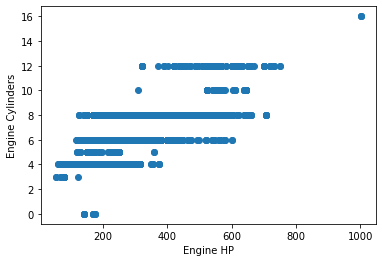

In [21]:
plt.scatter(data['Engine HP'], data['Engine Cylinders'])
plt.xlabel("Engine HP")
plt.ylabel("Engine Cylinders")
pass

In [22]:
data['Engine HP'].max()

1001.0

In [23]:
data['Engine HP'].min()

55.0

Так же понятно, что количество лошадиных сил зависит от цены автомобиля.
Построим поэтому диаграмму рассеивания для двух признаков: `Engine HP` и `MSRP`.

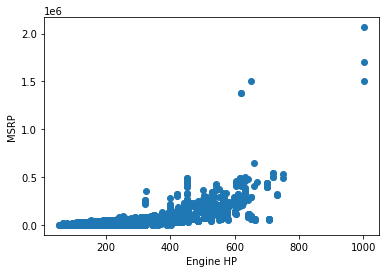

In [24]:
plt.scatter(data['Engine HP'], data['MSRP'])
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
pass

In [25]:
data['MSRP'].min()

2000

In [26]:
data['MSRP'].max()

2065902

Построим диаграмму рассеивания для двух признаков: Engine HP и city mpg.

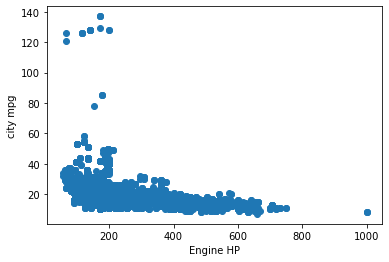

In [27]:
plt.scatter(data['Engine HP'], data['city mpg'])
plt.xlabel("Engine HP")
plt.ylabel("city mpg")
pass

In [28]:
data['city mpg'].min()

7

In [29]:
data['city mpg'].max()

137

Построим диаграмму рассеивания для двух признаков: Engine HP и highway MPG.

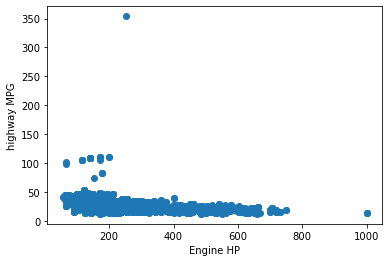

In [30]:
plt.scatter(data['Engine HP'], data['highway MPG'])
plt.xlabel("Engine HP")
plt.ylabel("highway MPG")
pass

In [31]:
data['highway MPG'].min()

12

In [32]:
data['highway MPG'].max()

354

Мы видим точки соответствующие машинам с чрезмерно большим количеством лошадиных сил, чрезмерной ценой, и чрезмерным расходом топлипа по шоссе и городу. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем квантили для признаков `Engine HP`,  `MSRP`,  `city mpg`, `highway MPG`:

In [33]:
data['Engine HP'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     79.0
0.010     90.0
0.050    118.0
0.100    138.0
0.500    227.0
0.900    385.0
0.950    460.0
0.990    620.0
0.995    645.0
Name: Engine HP, dtype: float64

In [34]:
data['MSRP'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      2000.00
0.010      2000.00
0.050      2000.00
0.100      2254.60
0.500     29995.00
0.900     65080.00
0.950    107530.25
0.990    284488.12
0.995    356605.65
Name: MSRP, dtype: float64

In [35]:
data['city mpg'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    10.000
0.010    10.000
0.050    12.000
0.100    13.000
0.500    18.000
0.900    26.000
0.950    29.000
0.990    44.000
0.995    85.435
Name: city mpg, dtype: float64

In [36]:
data['highway MPG'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    14.0
0.010    15.0
0.050    17.0
0.100    18.0
0.500    26.0
0.900    35.0
0.950    38.0
0.990    46.0
0.995    90.0
Name: highway MPG, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака `'Engine HP'` находится в диапазоне от $79.0$ до $645.0$ л.с. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

$99.9\%$ всех значений признака `'MSRP'` находится в диапазоне от $2000.0$ до $356605.65$ 

$99.9\%$ всех значений признака `'city mpg'` находится в диапазоне от $10.000$ до $85.435$ 

$99.9\%$ всех значений признака `'highway MPG'` находится в диапазоне от $14.0$ до $90.0$ 

Удалим все объекты лежащие за этими границами:

In [37]:
rows_to_drop = data[
    (data['Engine HP'] < data['Engine HP'].quantile(0.005)) | (data['Engine HP'] > data['Engine HP'].quantile(0.995)) |
    (data['MSRP'] < data['MSRP'].quantile(0.005)) | (data['MSRP'] > data['MSRP'].quantile(0.995)) |
    (data['city mpg'] < data['city mpg'].quantile(0.005)) | (data['city mpg'] > data['city mpg'].quantile(0.995)) |
    (data['highway MPG'] < data['highway MPG'].quantile(0.005)) | (data['highway MPG'] > data['highway MPG'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(11647, 16)

In [38]:
rows_to_drop

Int64Index([  460,   461,   462,   463,   464,   465,   539,   540,   541,
              598,
            ...
             9868,  9869,  9870,  9871,  9872, 10093, 10094, 11362, 11363,
            11364],
           dtype='int64', length=267)

In [39]:
data['Engine Cylinders'].value_counts()

4.0     4723
6.0     4485
8.0     1972
5.0      225
12.0     150
10.0      65
0.0        5
3.0        1
Name: Engine Cylinders, dtype: int64

У признака `Engine Cylinders` встречается нетипичное значение 0.0, а так же весьма редкое 3.0, удалим их из таблицы

In [40]:
data = data.drop(data[(data['Engine Cylinders'] == 0.0)].index)
data = data.drop(data[(data['Engine Cylinders'] == 3.0)].index)

In [41]:
data['Engine Cylinders'].value_counts()

4.0     4723
6.0     4485
8.0     1972
5.0      225
12.0     150
10.0      65
Name: Engine Cylinders, dtype: int64

In [42]:
data.count

<bound method DataFrame.count of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cyli

Мы избавились от 268 выбросов.

## 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных.
Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [43]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11641.000000,11616.000000,11620.000000,11641.000000,11641.000000,11641.000000,11641.000000,11641.000000
mean,2010.433296,246.785468,5.606971,3.448931,26.275062,19.272571,1552.207714,37334.613693
std,7.528037,102.280058,1.650451,0.874608,6.203059,5.502219,1439.802405,38338.965853
min,1990.000000,79.000000,4.000000,2.000000,14.000000,10.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21055.000000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29900.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,41820.000000
max,2017.000000,645.000000,12.000000,4.000000,74.000000,78.000000,5657.000000,340990.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.


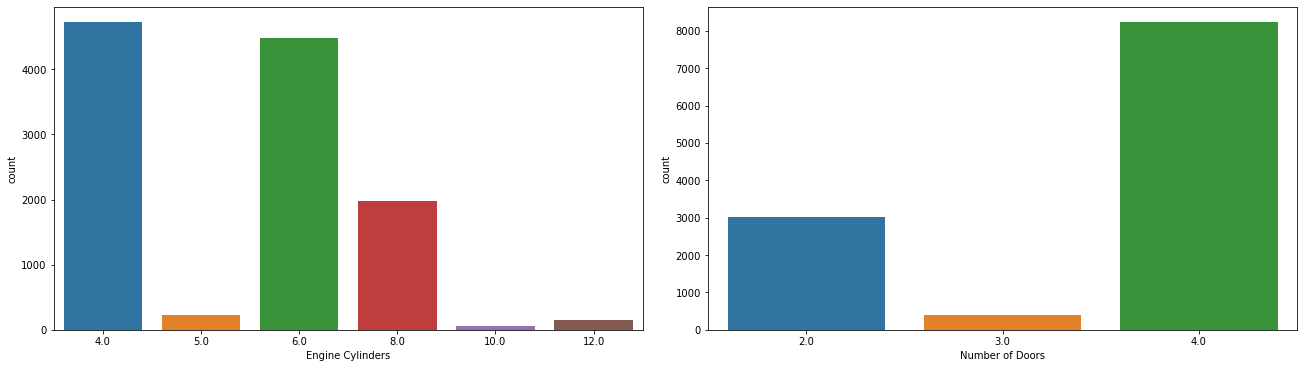

In [44]:
fig, ax = plt.subplots(1,2, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='Engine Cylinders', data = data, ax=ax[0])
sns.countplot(x ='Number of Doors', data = data, ax=ax[1])

Анализируя графики нетрудно заметить, что меньше всего в датасете объектов с признаком `Engine Cylinders` равным 5.0, 10.0 и 12.0, а больше всего 4.0 и 6.0 , а с признаком `Number of Doors` меньше всего 3.0, а больше всего 4.0

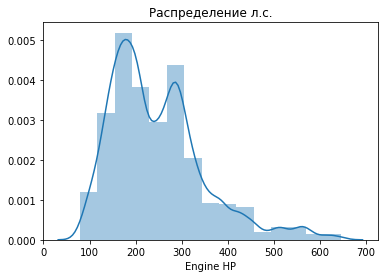

In [45]:
sns.distplot(data['Engine HP'], bins = 15)
plt.title('Распределение л.c.')
pass

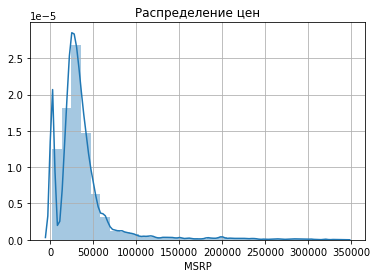

In [46]:
sns.distplot(data['MSRP'], bins=30)
plt.grid()
plt.title('Распределение цен')
pass

Признак MSRP принимает большой диапозон значений.

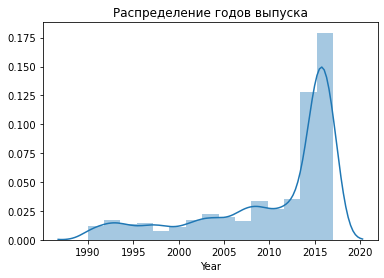

In [47]:
sns.distplot(data['Year'], bins = 15)
plt.title('Распределение годов выпуска')
pass

Признак Year принимает также большой диапозон значений.

Получим информацию о категориальных:

In [48]:
data.describe(include=['category'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11641,11641,11638,11641,11641,7944,11641,11641
unique,45,872,10,5,4,70,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1093,156,7091,8200,4696,1108,4605,2997


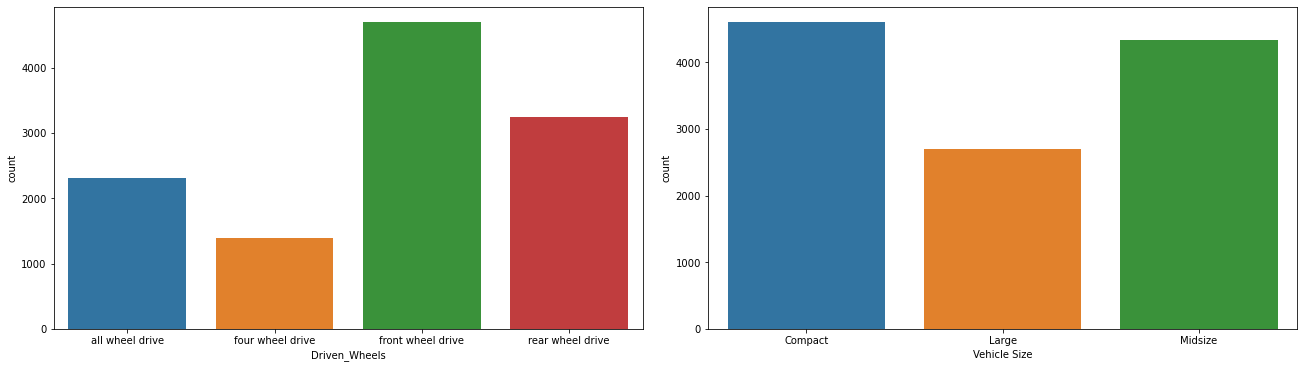

In [49]:
fig, ax = plt.subplots(1,2, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='Driven_Wheels', data = data, ax=ax[0])
sns.countplot(x ='Vehicle Size', data = data, ax=ax[1])

Анализируя графики нетрудно заметить, что меньше всего в датасете объектов с признаком `Driven_Wheels` four wheel drive, а больше всего с front wheel drive, а с признаком `Number of Doors` меньше всего Large Vehicle Size, а больше всего Compact

### Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [50]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

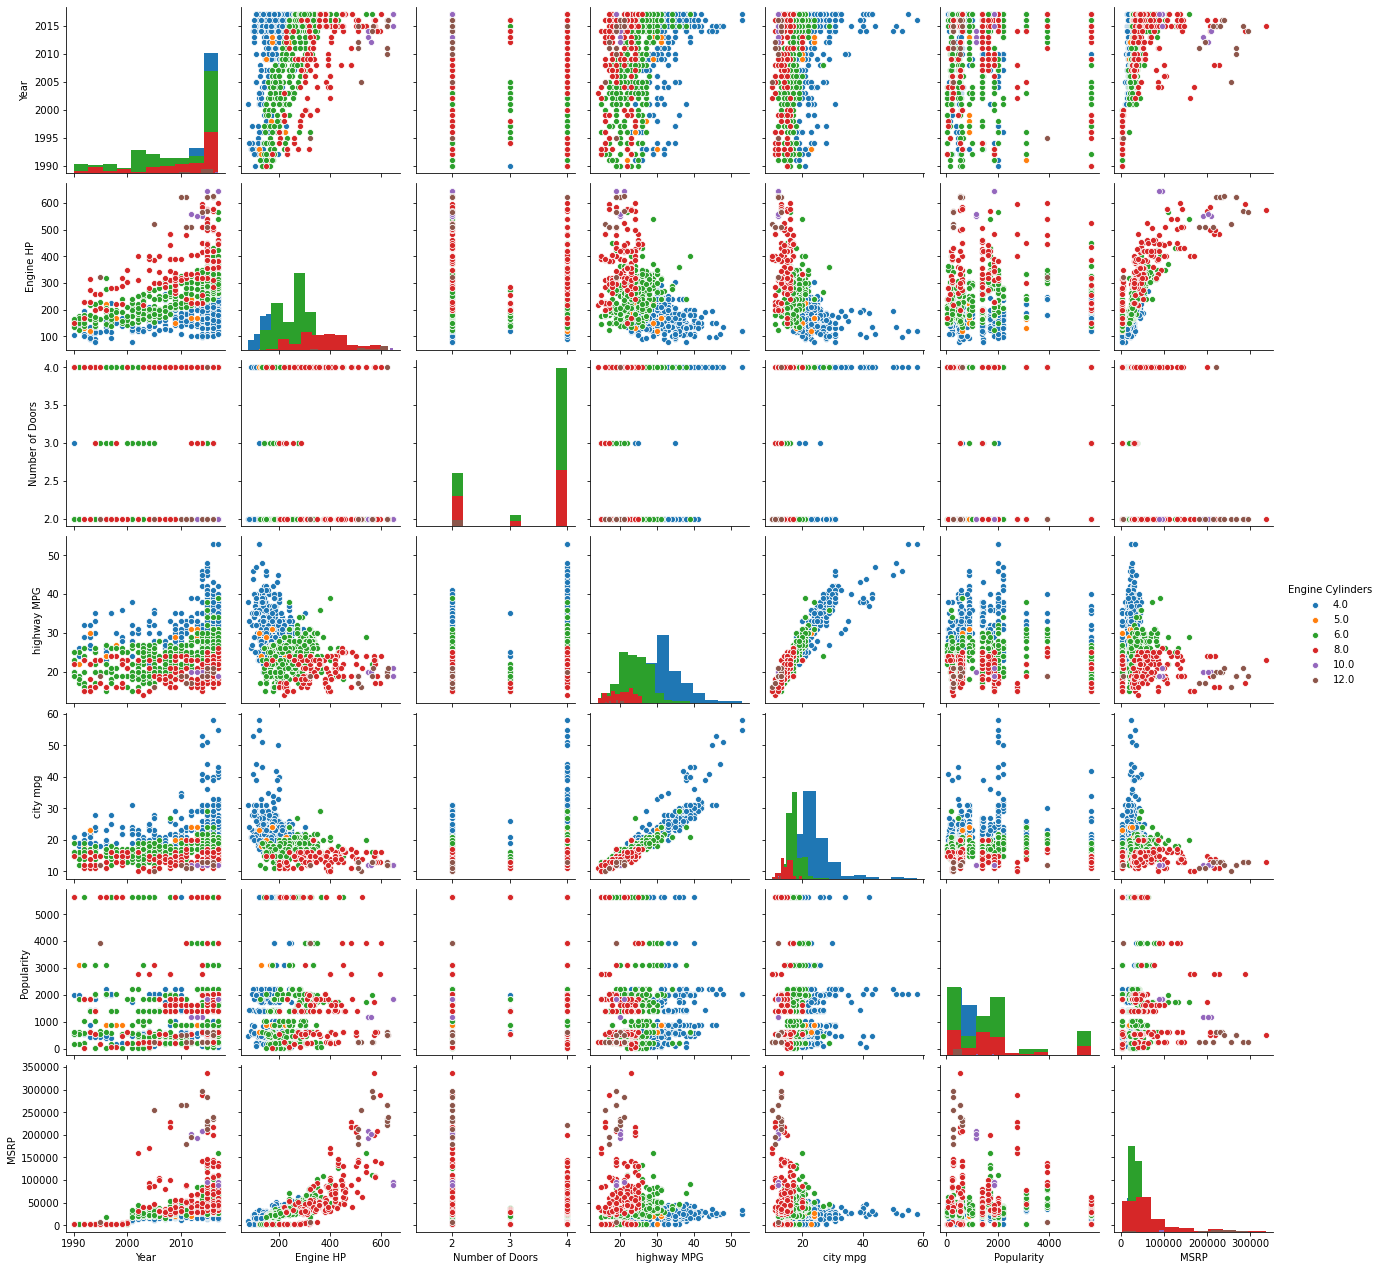

In [51]:
temp = data[['Make', 'Model', 'Year',
       'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 
       'Vehicle Size', 'highway MPG', 'city mpg','Popularity','MSRP']]

sns.pairplot(temp.iloc[random_subset], diag_kind='hist', hue= 'Engine Cylinders')

### Ящик с усами

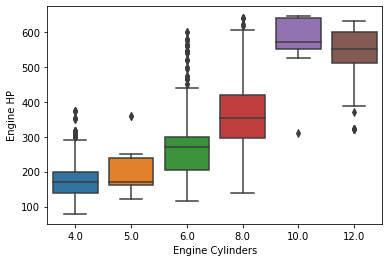

In [52]:
sns.boxplot(x="Engine Cylinders", y="Engine HP", data=data)
pass

### Скрипичный график

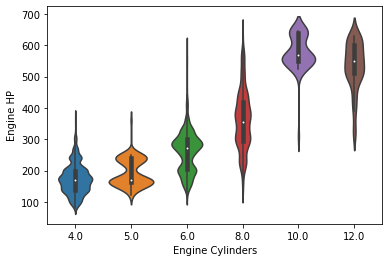

In [53]:
sns.violinplot(x="Engine Cylinders", y="Engine HP", data=data)
pass

### Корреляционная матрица

In [54]:
corr_mat = data.corr()
corr_mat

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.364812,-0.037082,0.256406,0.328877,0.271202,0.082682,0.355223
Engine HP,0.364812,1.000000,0.769191,-0.074415,-0.462469,-0.512984,0.045952,0.772433
Engine Cylinders,-0.037082,0.769191,1.000000,-0.110331,-0.683435,-0.678750,0.054213,0.569026
Number of Doors,0.256406,-0.074415,-0.110331,1.000000,0.116683,0.134759,-0.044132,-0.119626
highway MPG,0.328877,-0.462469,-0.683435,0.116683,1.000000,0.916412,-0.048218,-0.225519
city mpg,0.271202,-0.512984,-0.678750,0.134759,0.916412,1.000000,-0.024485,-0.262536
Popularity,0.082682,0.045952,0.054213,-0.044132,-0.048218,-0.024485,1.000000,-0.039602
MSRP,0.355223,0.772433,0.569026,-0.119626,-0.225519,-0.262536,-0.039602,1.000000


Удобно использовать визуальный образ этой матрицы. Чем ярче ячейка, тем больше по абсолютной величине коэффициент корреляции:

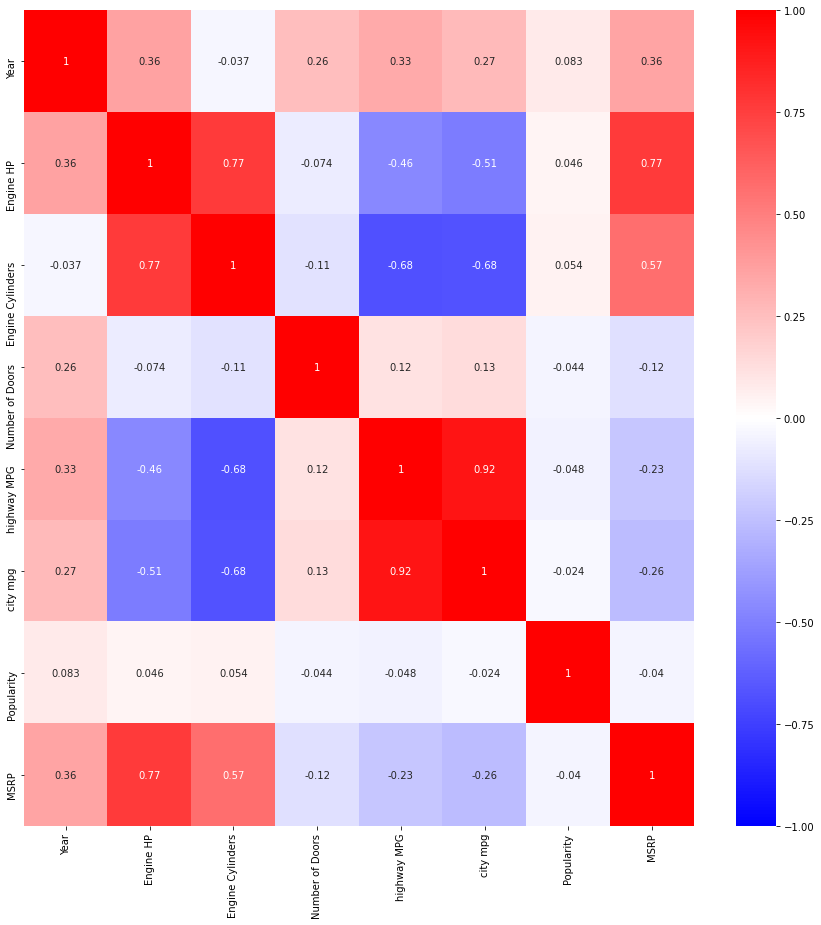

In [55]:
# sns.heatmap(corr_mat, square=True, cmap='coolwarm')
# pass
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(corr_mat, center=0, annot=True, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns)

In [56]:
corr_mat > 0.5

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,True,False,False,False,False,False,False,False
Engine HP,False,True,True,False,False,False,False,True
Engine Cylinders,False,True,True,False,False,False,False,True
Number of Doors,False,False,False,True,False,False,False,False
highway MPG,False,False,False,False,True,True,False,False
city mpg,False,False,False,False,True,True,False,False
Popularity,False,False,False,False,False,False,True,False
MSRP,False,True,True,False,False,False,False,True


In [57]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

highway MPG       city mpg            0.916412
Engine HP         MSRP                0.772433
                  Engine Cylinders    0.769191
Engine Cylinders  MSRP                0.569026
dtype: float64

Коэффициенты корреляции `highway MPG` и `city mpg` близок к 1, т.е. между этими признаками наблюдается положительная корреляция.

Наблюдается высокая степень связи между `Engine HP` и `MSRP`, `Engine HP` и `Engine Cylinders`, а так же между `Engine Cylinders` и `MSRP`

In [58]:
corr_mat.loc['Year', 'Number of Doors'],corr_mat.loc['Number of Doors', 'city mpg']

(0.25640563879154055, 0.13475936490747162)

Коэффициенты корреляции между `Year` и `Number of Doors`, а также между `Number of Doors` и `city mpg` весьма малы, что вполне объяснимо предметной областью.

##  4. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [59]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              25
Engine Cylinders       21
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3697
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

Удалим столбец `Market Category`

In [60]:
data=data.drop(data.columns[[9]], axis='columns')

In [61]:
data.shape

(11641, 15)

Строки с пропущенными значениями в столбцах `Engine Fuel Type`, `Engine HP`, `Engine Cylinders`, `Number of Doors` удалим, количество данных от этого изменится не сильно: 

In [62]:
data = data.dropna(subset=['Engine Fuel Type']) 
data = data.dropna(subset=['Engine HP'])
data = data.dropna(subset=['Engine Cylinders']) 

In [63]:
data.isna().sum()  

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [64]:
data.shape

(11592, 15)

В итоге, количество данных об автомобилях уменьшилось всего на 56.

## 5. Векторизация категориальных признаков

In [65]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,2010.432626,246.848861,5.607574,3.447119,26.275707,19.268634,1551.765959,37355.183057
std,7.533283,102.367021,1.651760,0.875455,6.193169,5.468678,1436.560293,38410.596412
min,1990.000000,79.000000,4.000000,2.000000,14.000000,10.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21033.750000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29895.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,41842.500000
max,2017.000000,645.000000,12.000000,4.000000,53.000000,58.000000,5657.000000,340990.000000


In [66]:
data.describe(include=['category'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11592,11592,11592,11592,11592,11592,11592
unique,45,869,8,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1087,156,7074,8165,4672,4581,2980


Удалим столбецы `Make` и `Model` и  поскольку в них много, а именно 46 и 888 уникальных значений.

In [67]:
data.drop(['Make'], axis='columns', inplace=True)
data.drop(['Model'], axis='columns', inplace=True)

Проведем векторизацию категориальных (номинальных) признаков:

In [68]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_columns= ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [69]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= []
nonbinary_columns= ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']


К небинарными признакам применим метод векторизации, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `Driven_Wheels` принимает 4 различных значений: 

In [70]:
data['Driven_Wheels'].unique()

[rear wheel drive, front wheel drive, all wheel drive, four wheel drive]
Categories (4, object): [rear wheel drive, front wheel drive, all wheel drive, four wheel drive]

Заменим признак `Driven_Wheels` на 4 признака: Driven_Wheels_rear_wheel_drive, Driven_Wheels_front_wheel_drive, Driven_Wheels_all_wheel_drive, Driven_Wheels_four_wheel_drive.

Если признак `Driven_Wheels` принимает значение rear wheel drive, то признак Driven_Wheels_rear_wheel_drive равен 1, а все остальные равны 0.
Если признак `Driven_Wheels` принимает значение front wheel drive, то признак Driven_Wheels_front_wheel_drive равен 1, а все остальные равны 0. и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies.

In [71]:
data[categorical_columns]

,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...
11909,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [72]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['Engine Fuel Type_diesel', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'Vehicle Style_2dr Hatchback', 'Vehicle Style_2dr SUV',
       'Vehicle S

In [73]:
len(data_categorical.columns)

38

## 6. Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

Не будем нормализовать целевой признак `Engine Cylinders`

In [74]:
numerical_columns_without_Driven_Wheels = ['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

In [75]:
data_numerical_without_Driven_Wheels = data[numerical_columns_without_Driven_Wheels]
data_numerical_without_Driven_Wheels.describe()

,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,2010.432626,246.848861,3.447119,26.275707,19.268634,1551.765959,37355.183057
std,7.533283,102.367021,0.875455,6.193169,5.468678,1436.560293,38410.596412
min,1990.000000,79.000000,2.000000,14.000000,10.000000,2.000000,2000.000000
25%,2007.000000,170.000000,2.000000,22.000000,16.000000,549.000000,21033.750000
50%,2015.000000,225.000000,4.000000,26.000000,18.000000,1385.000000,29895.000000
75%,2016.000000,300.000000,4.000000,30.000000,22.000000,2009.000000,41842.500000
max,2017.000000,645.000000,4.000000,53.000000,58.000000,5657.000000,340990.000000


In [76]:
data_numerical_without_Driven_Wheels = (data_numerical_without_Driven_Wheels - data_numerical_without_Driven_Wheels.mean(axis = 0))/data_numerical_without_Driven_Wheels.std(axis = 0)

In [77]:
data_numerical_without_Driven_Wheels.describe()

,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04
mean,-3.022609e-15,6.031570e-16,1.475453e-14,-1.635413e-15,2.483161e-15,7.788034e-16,2.313180e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.712314e+00,-1.639677e+00,-1.652991e+00,-1.982137e+00,-1.694858e+00,-1.078803e+00,-9.204539e-01
25%,-4.556613e-01,-7.507189e-01,-1.652991e+00,-6.903908e-01,-5.977009e-01,-6.980326e-01,-4.249201e-01
50%,6.062926e-01,-2.134365e-01,6.315362e-01,-4.451798e-02,-2.319818e-01,-1.160870e-01,-1.942220e-01
75%,7.390369e-01,5.192213e-01,6.315362e-01,6.013549e-01,4.994565e-01,3.182839e-01,1.168250e-01
max,8.717811e-01,3.889447e+00,6.315362e-01,4.315124e+00,7.082401e+00,2.857683e+00,7.904975e+00


## Соединяем все в одну таблицу

In [78]:
data = pd.concat((data['Engine Cylinders'], data_numerical_without_Driven_Wheels, data_categorical), axis = 1)
print(data.shape)

(11592, 46)


In [79]:
data.describe()

,Engine Cylinders,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
count,11592.000000,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,1.159200e+04,11592.000000,11592.0,...,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000,11592.000000
mean,5.607574,-3.022609e-15,6.031570e-16,1.475453e-14,-1.635413e-15,2.483161e-15,7.788034e-16,2.313180e-16,0.013199,0.0,...,0.065131,0.002157,0.096877,0.058747,0.053140,0.035542,0.011042,0.033299,0.257074,0.050638
std,1.651760,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.114130,0.0,...,0.246768,0.046392,0.295803,0.235161,0.224322,0.185153,0.104504,0.179423,0.437039,0.219268
min,4.000000,-2.712314e+00,-1.639677e+00,-1.652991e+00,-1.982137e+00,-1.694858e+00,-1.078803e+00,-9.204539e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-4.556613e-01,-7.507189e-01,-1.652991e+00,-6.903908e-01,-5.977009e-01,-6.980326e-01,-4.249201e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.062926e-01,-2.134365e-01,6.315362e-01,-4.451798e-02,-2.319818e-01,-1.160870e-01,-1.942220e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,7.390369e-01,5.192213e-01,6.315362e-01,6.013549e-01,4.994565e-01,3.182839e-01,1.168250e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.000000,8.717811e-01,3.889447e+00,6.315362e-01,4.315124e+00,7.082401e+00,2.857683e+00,7.904975e+00,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Отбор признаков 

Для классификации автомобилей по признаку обозначенному `Engine Cylinders`, будем использовать все входные признаки.

### X и y

In [80]:
# X - вся таблица без столбца Driven_Wheels
# y - только столбец Driven_Wheels
X = data.drop('Engine Cylinders', axis = 1) # выбрасываем столбец 'Driven_Wheels'
y = data['Engine Cylinders']
feature_names = X.columns

In [81]:
type(feature_names)

pandas.core.indexes.base.Index

In [82]:
feature_names
# д.б. все колонки, кроме Driven_Wheels

Index(['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', '

In [83]:
X = X.to_numpy()

In [84]:
y = y.to_numpy()

In [85]:
print(y)

[6. 6. 6. ... 6. 6. 6.]


In [86]:
print(X.shape)
print(y.shape)
N, d = X.shape

(11592, 45)
(11592,)


In [87]:
type(X)

numpy.ndarray

In [88]:
type(y)

numpy.ndarray

## 8. Разбиваем на тренировочную и тестовую выборки

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# тестовая выборка - 30% данных
# random_state фиксирует split

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

8114 3478
X_train:  (8114, 45)
X_test:   (3478, 45)
y_train:  (8114,)
y_test:   (3478,)


### kNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm


y_train_pred = []
y_test_pred = []

iter_ = range(1, 37, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(X_train, y_train)
    
    y_train_pred.append(neigh.predict(X_train))
    y_test_pred.append(neigh.predict(X_test))


100%|██████████| 18/18 [01:11<00:00,  3.97s/it]


'best number of neighbors: 1'

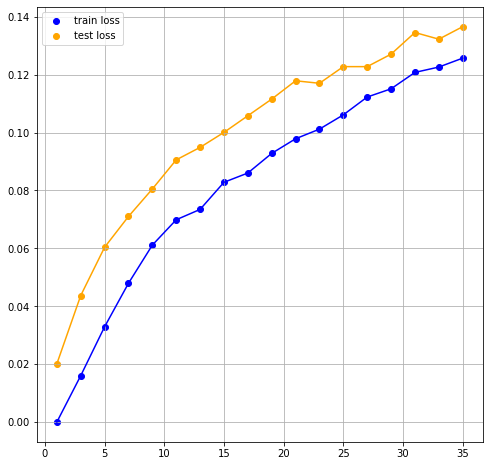

In [91]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

In [92]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
f"error: {np.mean(y_test != y_pred):.3f}"

'error: 0.020'

Также построим матрицу ошибок(confusion matrix) для лучшего случая (один сосед):

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred[0])

array([[1390,    1,   12,    0,    0,    0],
       [   0,   73,    5,    0,    0,    0],
       [   8,    2, 1314,   11,    0,    0],
       [   0,    0,   29,  578,    0,    0],
       [   0,    0,    0,    0,   15,    0],
       [   0,    0,    0,    2,    0,   38]])

На диагонали представлены "большие" значения, соответствующие тому, что метод сделал правильный прогноз.
Ошибок мало.

Из собранных предсказанний на тестовой выборки найдем оптимальное количество ближайших соседей.
Оптимальным является 1 ближайший сосед. Получили, что ошибка на тестовой выборке = 0.020, а ошибка на обучающей выборке = 0.0, что можно считать очень хорошим результатом.

### Random forest

In [94]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 250)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
print(y_train_predict)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("err train = ", err_train)
print("err test = ", err_test)
print(confusion_matrix(y_test, y_test_predict))

[8. 6. 6. ... 6. 4. 6.]
err train =  0.0
err test =  0.011500862564692352
[[1391    0   12    0    0    0]
 [   2   73    3    0    0    0]
 [   3    0 1330    2    0    0]
 [   0    0   15  592    0    0]
 [   0    0    0    0   15    0]
 [   0    0    0    3    0   37]]


### SVC

In [95]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("err train = ", err_train)
print("err test = ", err_test)
print(confusion_matrix(y_test, y_test_predict))

err train =  0.08343603648015775
err test =  0.08338125359401956
[[1336    0   67    0    0    0]
 [  46    0   32    0    0    0]
 [  35    0 1267   33    0    0]
 [   0    0   58  541    0    8]
 [   0    0    0    3   12    0]
 [   0    0    0    8    0   32]]


## Общие выводы

В результате был проанализирован датасет Car Features and MSRP, визуализированы данные.

1. Для некоторых признаков (`highway MPG` и `city mpg`, `Engine HP` и `MSRP`, `Engine HP` и `Engine Cylinders`, а так же между `Engine Cylinders` и `MSRP`) корреляция довольно велика.

2. Объекты с некоторыми признаками содержали выбросы, поэтому было проведено удаление объектов с ними для наилучшей работы алгоритмов машинного обучения.

3. Некоторые признаки (`Market Category`) содержали большое количество пропущенных значений (3697), поэтому было проведено удаление этого признака.

4. Провередена векторизация категориальных и нормализация количественных признаков для наилучшей работы алгоритмов машинного обучения.

5. Обучено несколько различных классификаторов, а именно метод опорных векторов, метод ближайших соседей, Random Forest.

6. Наилучшая достигнутая точность была получена на методе Random Forest и равна примерно 98%. 

7. Хуже всех себя показал метод опорных векторов с точностью 92%

## PCA

Применим алгоритм PCA для сокращения размерности пространства признаков.

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_proj = pca.transform(X)
print(X.shape)
print(X_proj.shape)

(11592, 45)
(11592, 2)


In [97]:
print("Главные компоненты (по строкам):")
print(pca.components_)
print("Дисперсии по главным компонентам, собственные значения вдоль каждой компоненты:")
print(pca.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca.explained_variance_))
print("Соответствующие сингулярные значения:")
print(pca.singular_values_)

Главные компоненты (по строкам):
[[ 2.42695273e-02  5.01089464e-01 -1.14501415e-01 -4.79534341e-01
  -4.93128802e-01  3.85047368e-02  3.94229537e-01 -7.86554853e-03
   4.13555108e-27  5.01314236e-04  6.11481240e-03  2.65320236e-02
   0.00000000e+00 -1.55649257e-04 -4.86782303e-03  9.30111298e-02
  -1.13270259e-01  3.67908993e-03  3.64998614e-02 -2.81243074e-04
  -4.00589983e-02  1.61289987e-04  3.38784170e-02  4.61364359e-02
  -1.89238669e-01  1.09223816e-01 -9.88064840e-02  1.03177346e-01
  -4.37086189e-03 -2.03381105e-02  1.93566596e-03 -4.00550830e-02
   2.50141061e-02 -1.01869420e-03  3.26359409e-03  2.06801472e-02
  -2.72765092e-04  3.20330175e-02  2.25564656e-02  1.39780476e-02
  -2.22428604e-04  6.20681450e-03  7.96764309e-03 -5.80613836e-02
  -1.36670367e-02]
 [-6.44990050e-01 -2.97852526e-01 -2.81567237e-01 -3.30619015e-01
  -2.89734816e-01 -2.63036655e-03 -3.71110898e-01 -8.62748998e-03
   1.50235914e-25 -3.74420502e-04 -4.28476925e-03 -5.35148252e-03
   0.00000000e+00 -1.131

In [98]:
y_names = np.unique(y)
K = len(y_names)
print(y_names)

[ 4.  5.  6.  8. 10. 12.]


In [99]:
y1 = y.reshape(y.shape[0], 1)
pca_data = np.concatenate([X_proj, y1], axis=1)

             x1        x2        class
0      1.010470  0.296470  6 Cylinders
1      0.616636  0.332786  6 Cylinders
2      0.493682  0.333097  6 Cylinders
3      0.260558  0.709400  6 Cylinders
4      0.301037  0.648862  6 Cylinders
...         ...       ...          ...
11587  1.007505 -0.528029  6 Cylinders
11588  1.115786 -0.629960  6 Cylinders
11589  1.053691 -0.571507  6 Cylinders
11590  0.962113 -0.641522  6 Cylinders
11591 -0.347995  0.375085  6 Cylinders

[11592 rows x 3 columns]


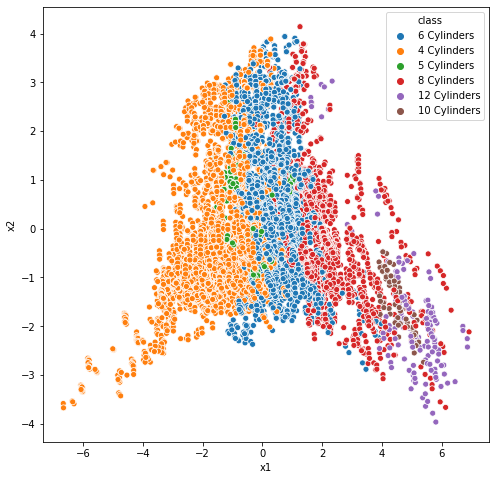

In [100]:
df = pd.DataFrame(data = pca_data, columns=["x1", 'x2', 'class'])
df.loc[df['class'] == 4, 'class'] = '4 Cylinders'
df.loc[df['class'] == 5, 'class'] = '5 Cylinders'
df.loc[df['class'] == 6, 'class'] = '6 Cylinders'
df.loc[df['class'] == 8, 'class'] = '8 Cylinders'
df.loc[df['class'] == 10, 'class'] = '10 Cylinders'
df.loc[df['class'] == 12, 'class'] = '12 Cylinders'
sns.scatterplot(data=df, x="x1", y="x2", hue="class")
print(df)

Анализируя график, можно заметить, что 4 цилиндра отделимы от остальных, при этом все остальные классы пересекаются, например, классы с 5 и 6 цилиндрами. Также можно отметить, что если, к примеру, удалить классы с 5 и 10 цилиндров, то можно будет использовать метод линейной классификации в двумерном простанстве с хорошей точностью. При этом заметна тенденция, что при увеличении первой главной компоненты увеличивается число цилиндров.

Index(['Engine Cylinders', 'Year', 'Engine HP', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'Engine Fuel Type_diesel', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Ve

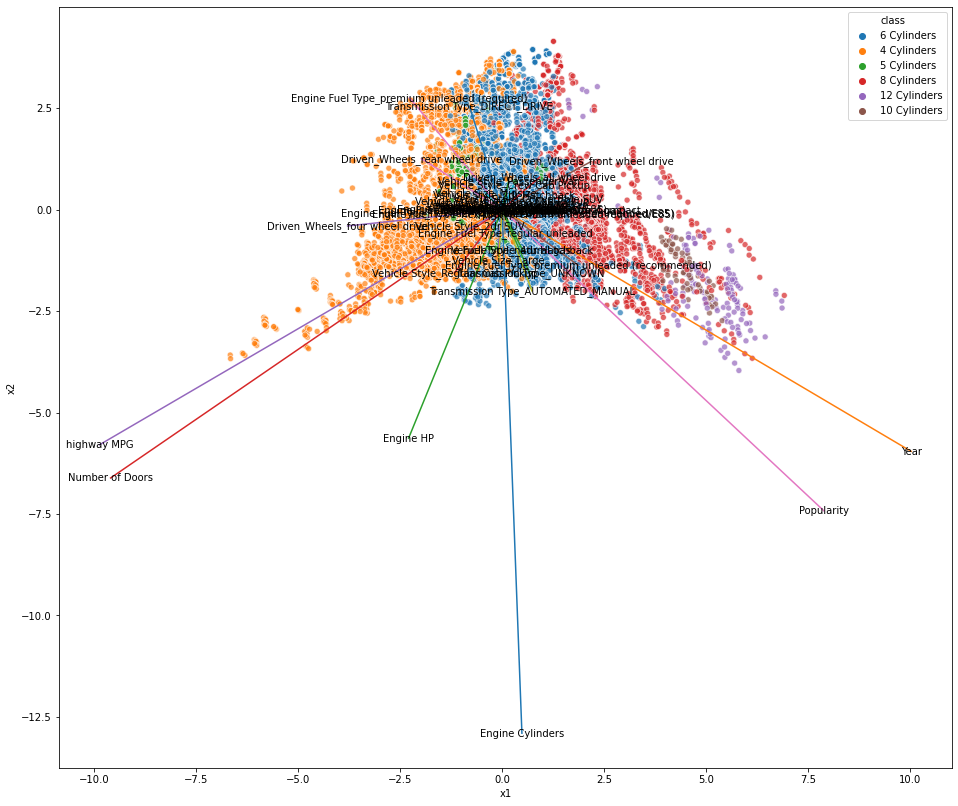

In [101]:
def component_plot(draw, coeff, labels):
    plt.figure(figsize=(16,14))
#     draw = pd.concat([Xx, y], axis=1, join='inner')
    sns.scatterplot(data=draw, x='x1', y='x2', hue='class', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*20, coeff[1, i]*20, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*20], [0, coeff[1, i]*20])
    
    
component_plot(df, pca.components_, data.columns)
print(data.columns)

### LDA

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [103]:
lda = LDA(n_components=2)
lda.fit(X_train, y_train.ravel())

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [104]:
# data_x_lda = np.array(data.drop(['class'], axis=1))
# data_y_lda = np.array(data['class'])

# from sklearn.model_selection import train_test_split
# _, _, y_train2, y_test2 = train_test_split(data_x_lda, data_y_lda, test_size = 0.25, random_state = 42)

In [105]:
y_train_pd = y_train.reshape(y_train.shape[0], 1)
cat = np.concatenate([X_train_lda, y_train_pd], axis=1)

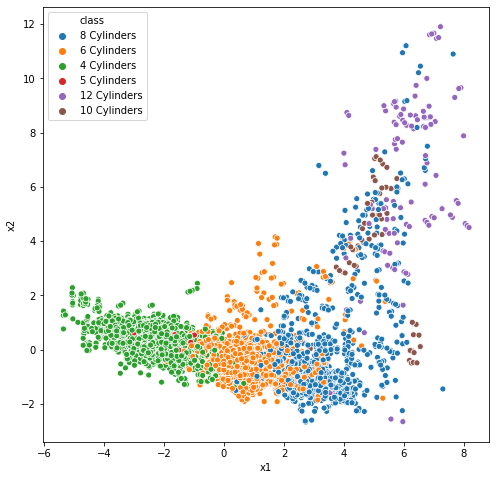

In [106]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=cat, columns=["x1", 'x2', 'class'])
df.loc[df['class'] == 4, 'class'] = '4 Cylinders'
df.loc[df['class'] == 5, 'class'] = '5 Cylinders'
df.loc[df['class'] == 6, 'class'] = '6 Cylinders'
df.loc[df['class'] == 8, 'class'] = '8 Cylinders'
df.loc[df['class'] == 10, 'class'] = '10 Cylinders'
df.loc[df['class'] == 12, 'class'] = '12 Cylinders'
sns.scatterplot(data=df, x="x1", y="x2", hue="class")

### Предобработка данных с помощью PCA для классификатора RF

Для понижения размерности данных будет использоваться метод главных компонент со всеми возможными количествами главных компонент. Был организован перебор с сохранением данных для всех количеств компонент от 1 до 46 включительно.

In [107]:
from sklearn import ensemble
from tqdm import tqdm

acc_train = []
acc_test = []

for i in tqdm(range(1, 46)):
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = ensemble.RandomForestClassifier(n_estimators = 250)
    clf.fit(X_train_pca, y_train.ravel())
    
    у_pred_train = clf.predict(X_train_pca)
    у_pred_test = clf.predict(X_test_pca)
    
    acc_train.append(np.mean(y_train != у_pred_train))
    acc_test.append(np.mean(y_test != у_pred_test))

100%|██████████| 45/45 [07:10<00:00,  9.58s/it]


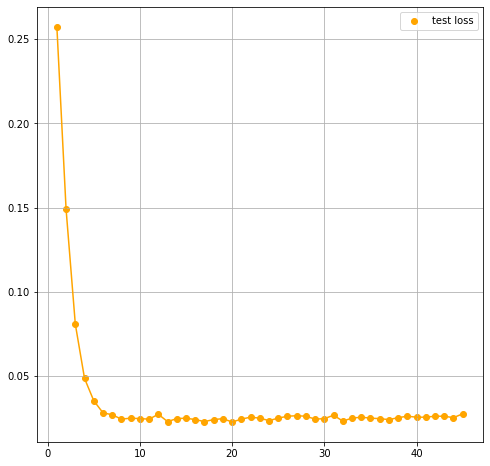

In [108]:
# plt.scatter(range(1,46), acc_train, label='train loss', color='blue')
plt.scatter(range(1,46), acc_test, label='test loss', color='orange')

# plt.plot(range(1,46), acc_train, color='blue')
plt.plot(range(1,46), acc_test, color='orange')
plt.legend()
plt.grid()

In [109]:
pd.set_option('display.max_columns', 50)
pd.DataFrame(acc_test, index=range(1,46)).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.257332,0.148936,0.080794,0.048591,0.035365,0.028177,0.027027,0.024439,0.025014,0.024727,0.024439,0.027315,0.023002,0.024727,0.025014,0.024152,0.023002,0.024152,0.024727,0.022714,0.024439,0.025589,0.025014,0.023577,0.025014,0.026164,0.026452,0.026164,0.024439,0.024727,0.02674,0.023289,0.025014,0.025589,0.025014,0.024727,0.024152,0.025302,0.026164,0.025589,0.025589,0.026164,0.026164,0.025302,0.027602


Анализируя график, можно заметить, что использование более чем 7-ми главных компонент для предстаказания целевого признака не дает сильных улучшений. Из чего кажется, что использование лишь 7-ми компонент кажется оптимальным.

### Общие выводы использования понижения размерности
В результате для датасета были применены методы LDA и PCA для визуализации. С помощью метода PCA была опробована возможность понижения размерности для улучшения точности алгоритма RF.

1.Использован метод LDA для визуализации данных в одномерном пространстве признаков. Графически в таком случае данные не выглядят, разделимы с хорошей точностью в силу слишком сильного понижения размерности и сложности (нелинейности) задачи.

2.PCA не позволяет улучшить точность алгоритма RM, произошло увеличение ошибки в два раза.
